In [2]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
os.getcwd()

'C:\\Users\\MokhnachevskiyAN'

In [5]:
df = pd.read_csv('C:\\Users\\MokhnachevskiyAN\\PycharmProjects\\pyth1\\habr\\video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df=df.dropna()

In [7]:
df.shape

(6825, 16)

In [8]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


In [9]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]

In [28]:
sales_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006.0
2,15.68,12.76,3.79,3.29,35.52,2008.0
3,15.61,10.93,3.28,2.95,32.77,2009.0
6,11.28,9.14,6.50,2.88,29.80,2006.0
7,13.96,9.18,2.93,2.84,28.92,2006.0


In [29]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 6 columns):
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Year_of_Release    6825 non-null float64
dtypes: float64(6)
memory usage: 373.2 KB


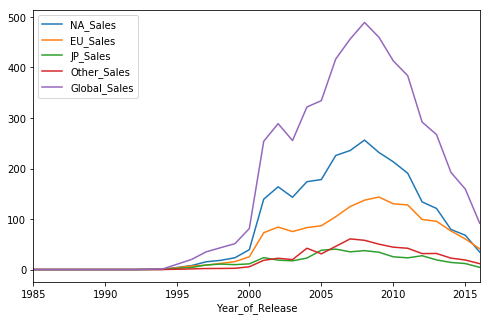

In [12]:
sales_df.groupby('Year_of_Release').sum().plot()

In [35]:
rcParams['figure.figsize'] = 12, 10

In [36]:
sales_df.groupby('Year_of_Release').sum().plot()

In [37]:
rcParams['figure.figsize'] = 8, 5

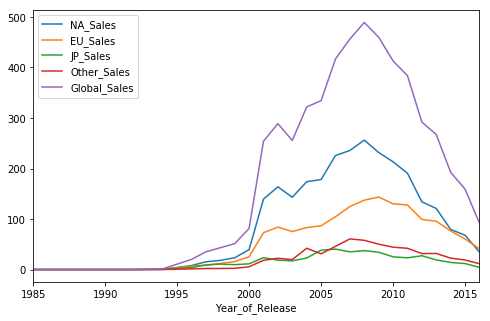

In [38]:
sales_df.groupby('Year_of_Release').sum().plot()

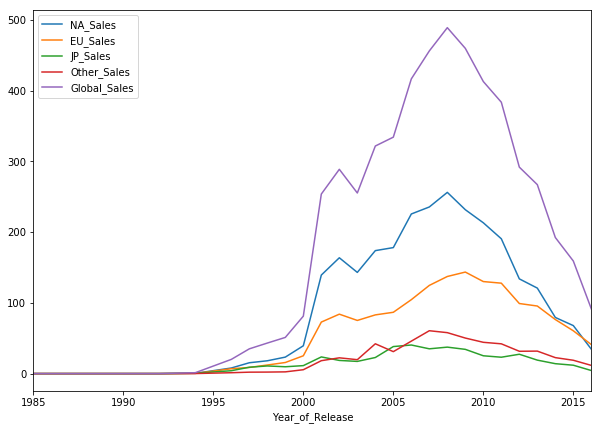

In [13]:
rcParams['figure.figsize'] = 10, 7
sales_df.groupby('Year_of_Release').sum().plot()

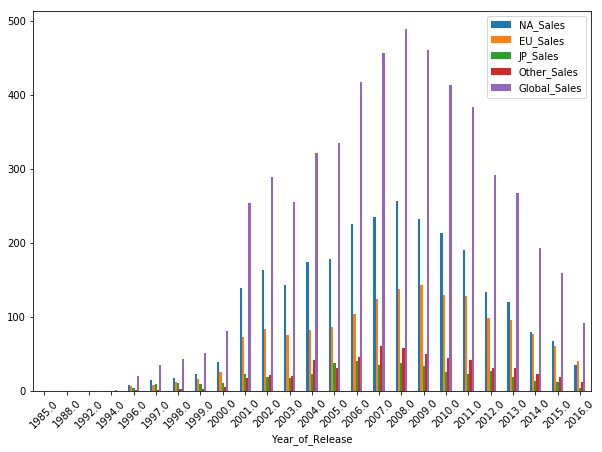

In [40]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

In [14]:
import sys
sys.path

['',
 'C:\\ProgramData\\Miniconda3\\python36.zip',
 'C:\\ProgramData\\Miniconda3\\DLLs',
 'C:\\ProgramData\\Miniconda3\\lib',
 'C:\\ProgramData\\Miniconda3',
 'C:\\ProgramData\\Miniconda3\\lib\\site-packages',
 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\MokhnachevskiyAN\\.ipython']

In [15]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
df['User_Score']=df['User_Score'].astype('float64')

In [16]:
top_platforms

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

In [17]:
df.Platform.value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [19]:
df.Platform.value_counts().sort_values(ascending = False).head(5)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Name: Platform, dtype: int64

In [20]:
df.Platform.value_counts().sort_values(ascending = False).head(5).index

Index(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype='object')

In [21]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null float64
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


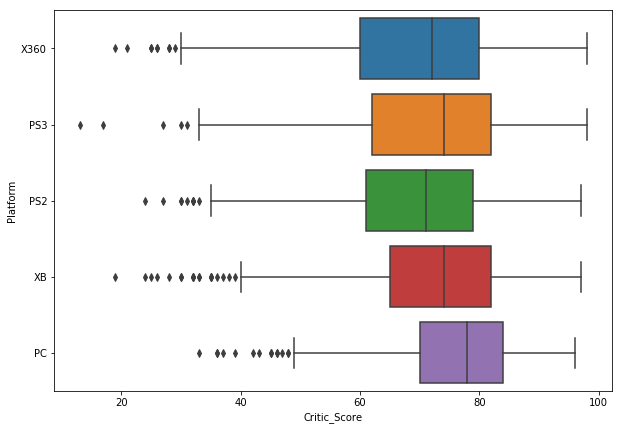

In [23]:
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")